___________________________________________________________________________
## **Happy Customers**
___________________________________________________________________________

___________________________________________________________________________
### **Context**
___________________________________________________________________________
We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can **predict what makes our customers happy or unhappy**, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.
___________________________________________________________________________
## **Objective**
___________________________________________________________________________
* Predict if a customer is happy or not based on the answers they give to questions asked.
* Find the most important features for customer happiness' prediction.
* Fin the minimal feature set to preserve the most information and to increase predictability.
___________________________________________________________________________
## **Dataset Description**
___________________________________________________________________________
* Y : target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers.
* X1 : my order was delivered on time.
* X2 : contents of my order was as I expected
* X3 : I ordered everything I wanted to order
* X4 : I paid a good price for my order
* X5 : I am satisfied with my courier
* X6 : the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.
___________________________________________________________________________

## **Importing the libraries and overview of the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To split data into train and test sets
from sklearn.model_selection import train_test_split

# Algorithms to be used
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Loading the dataset
df = pd.read_csv("ACME-HappinessSurvey2020.csv")

In [3]:
# Looking the first 5 records
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


## **Checking the info in the dataset**

In [4]:
# Let's see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


**Observations:**
* There are **126 rows** and **7 columns** in the dataset.
* There are **126 non-null values**, that means **there are no missing values.**

**Let's check the unique values in each column**

In [5]:
# Checking the count of unique values in each columns
df.nunique()

Y     2
X1    4
X2    5
X3    5
X4    5
X5    5
X6    5
dtype: int64

**Observations:**
* Y is the prediction variable. As indicated in the dataset description, it has 2 possible values.
* X1 (order delivered on time) has 4 possible values, while X2, X3, X4, X5 and X6 have 5 possible values. It seems they are measured in Likert scale.
* The variables X1 to X6 seem to be categorical, ordinal variables.

## **Exploratory Data Analysis**

## **Univariate Analysis**

In [6]:
cat_cols = ['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']
for col in cat_cols:
  print(df[col].value_counts(normalize = True))
  print('*'*40)

Y
1    0.547619
0    0.452381
Name: proportion, dtype: float64
****************************************
X1
5    0.515873
4    0.317460
3    0.158730
1    0.007937
Name: proportion, dtype: float64
****************************************
X2
3    0.333333
2    0.269841
1    0.214286
4    0.134921
5    0.047619
Name: proportion, dtype: float64
****************************************
X3
3    0.436508
4    0.261905
5    0.134921
2    0.111111
1    0.055556
Name: proportion, dtype: float64
****************************************
X4
4    0.420635
3    0.325397
5    0.198413
2    0.039683
1    0.015873
Name: proportion, dtype: float64
****************************************
X5
4    0.396825
5    0.246032
3    0.174603
2    0.126984
1    0.055556
Name: proportion, dtype: float64
****************************************
X6
5    0.452381
4    0.373016
3    0.158730
2    0.007937
1    0.007937
Name: proportion, dtype: float64
****************************************


**Observations:**

* ~ 54% of the customers in the survey sample claimed to be happy.
* About 52% of the customers answered 5 (the closest to the answer) to X1 (*my order was delivered on time*). Approximately 31% answered 4 to the same question.
* The most popular answer to X2 (*Contents of my order was as I expected*) is 3, and it accounts for ~ 33% of the customers. It is followed by 2 (~ 27%) and 1 (~ 21%). The least popular answer was 5 (~ 5%): it seems like there is a problem related with the condition of the order once opened.
* The most popular answer to X3 (*I ordered everything I wanted to order*) was 3 (~ 44%), followed by 4 (26%) and 5 (~ 13%). The question seems to be related to the available stock when the order was submitted, or the availability of a certain item.
* X4 (*I paid a good price for my order*) has the most popular answer at value 4 (~ 42%), followed by 3 (~ 33%) and 5 (~ 20%).
* The most popular answer to X5 (*I am satisfied with my courier*) is 4 (~ 40%), followed by 5 (~ 25%).
* The most popular answer to X6 (*The app makes ordering easy for me*) is 5 (~ 45%) followed by 4 (~ 37%).

## **Model Building Approach**

1. Data Preparation
2. Partition the data into train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

## **Data Preparation**


**Separating the independent variables (X) and the dependent variable (Y)**


In [7]:
# Separating the target variable and other variables
Y = df.Y
X = df.drop(['Y'], axis = 1)

**Splitting the data into 70% train and 30% test set.**

In [8]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

## **Model Evaluation Criterion**

**The model can make two types of wrong predicions:**

1. Predicting a customer will be happy when the customer is **unhappy.**
2. Preddicting a customer will be unhappy when the customer is **happy**.

**Which case is more important?**
* **Predicting that the customer will be happy but the customer is unhappy indeed,** that means possibly losing a customer, and any future order from it. This can be translated in financial loses, hence it is the most important case of wrong predictions.

**How to reduce this loss? (False positives)**

* **The company would want the Recall to be maximized,** the greater the recall, the higher the chances of minimizing false positives. Hence, the focus should be on increasing the Recall (minimizing the false positives): in other words, identifying the true negatives (class 0) very well, so that the company can run continuous improvement in its processes to foster customer satisfaction.


**We will create a function to calculate and print the classification report and confusion matrix.**

In [9]:
# Creating metric function

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (4, 4))
    sns.heatmap(data = cm, annot = True, fmt = '.2f', xticklabels = ['Unhappy', 'Happy'], yticklabels = ['Unhappy', 'Happy'] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [10]:
def model_performance_classification(model, predictors, target):
   # Predicting using the independent variables
   pred = model.predict(predictors)
   recall = recall_score(target, pred, average = 'macro') # To compute recall
   precision = precision_score(target, pred, average = 'macro') # To compute precision
   acc = accuracy_score(target, pred) # To compute accuracy
   # Creating a dataframe of metrics
   df_perf = pd.DataFrame(
       {
           "Precision" : precision,
           "Recall" : recall,
           "Accuracy" : acc,
       },
       index = [0]
   )
   return df_perf

## **Building the model**

Two different models are to be built:

* **Decision Tree**
* **Random Forest**

## **Building a Decision Tree Model**

* We will build our model using the **DecisionTreeClassifier** function.
* If the frequency of class 1 is 55% and the frequency of class 0 is 45%, then **class 1 is the dominant class and it could bias the decision tree.** To avoid it, we will set the **class_weight** hyperparameter to specify the weight of each class and give more weightage to class 0, i.e. "reverse" the weights.


In [11]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0 : 0.55, 1 : 0.45}, random_state = 1)

In [12]:
# Fitting decision tree
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.55, 1: 0.45}, random_state=1)

**Let's check the model performance of the decision tree.**

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        40
           1       1.00      0.88      0.93        48

    accuracy                           0.93        88
   macro avg       0.93      0.94      0.93        88
weighted avg       0.94      0.93      0.93        88



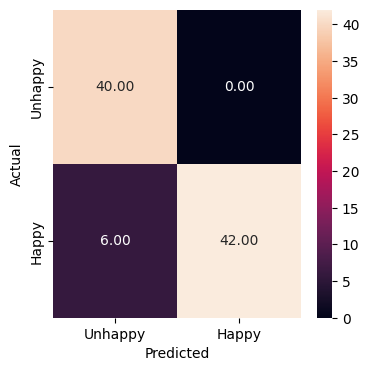

In [13]:
# Checking performance on the training set
y_train_pred_dt = dt.predict(x_train)
metrics_score(y_train, y_train_pred_dt)

**Observations:**
* The recall of class 0 (true negatives) is **100% on the training set.**
* The recall of class 1 (true positives) is **88% on the training set.**

              precision    recall  f1-score   support

           0       0.42      0.65      0.51        17
           1       0.50      0.29      0.36        21

    accuracy                           0.45        38
   macro avg       0.46      0.47      0.44        38
weighted avg       0.47      0.45      0.43        38



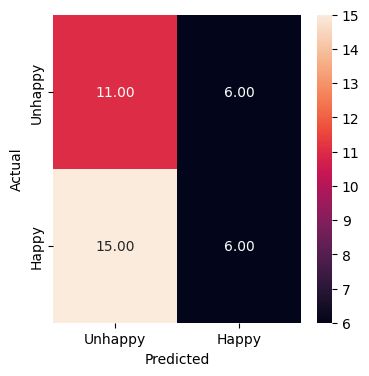

In [14]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)
metrics_score(y_test, y_test_pred_dt)

In [15]:
dtree_test = model_performance_classification(dt, x_test, y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.461538,0.466387,0.447368


**Observations:**

* The Decision Tree works well on the training data but **not so well on the test data** since the recall of class 0 (true negatives) is 65% on the test set, in contrast to 100% for the training dataset: the decision tree is overfitting the training data.

**Let's plot the feature importance and the most important features.**

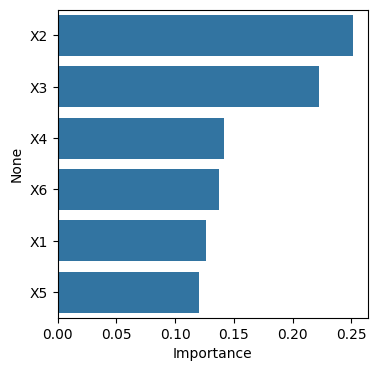

In [16]:
importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (4, 4))
sns.barplot(data = importance_df, x = 'Importance', y = importance_df.index)
plt.show()

**Observations:**

* The most important features are X2 (*Contents of my order was as I expected*) followed by X3 (*I ordered everything I wanted to order*)
* This might mean that for unhappy customers is very important the condition of their order when they open it i.e. the item could be different from the pictures in the website, it is a completely different item, the item is broken, etc.
* Also it could imply that unhappy customers are finding issues with availability of items or stock.

**Let's plot the decision tree.**

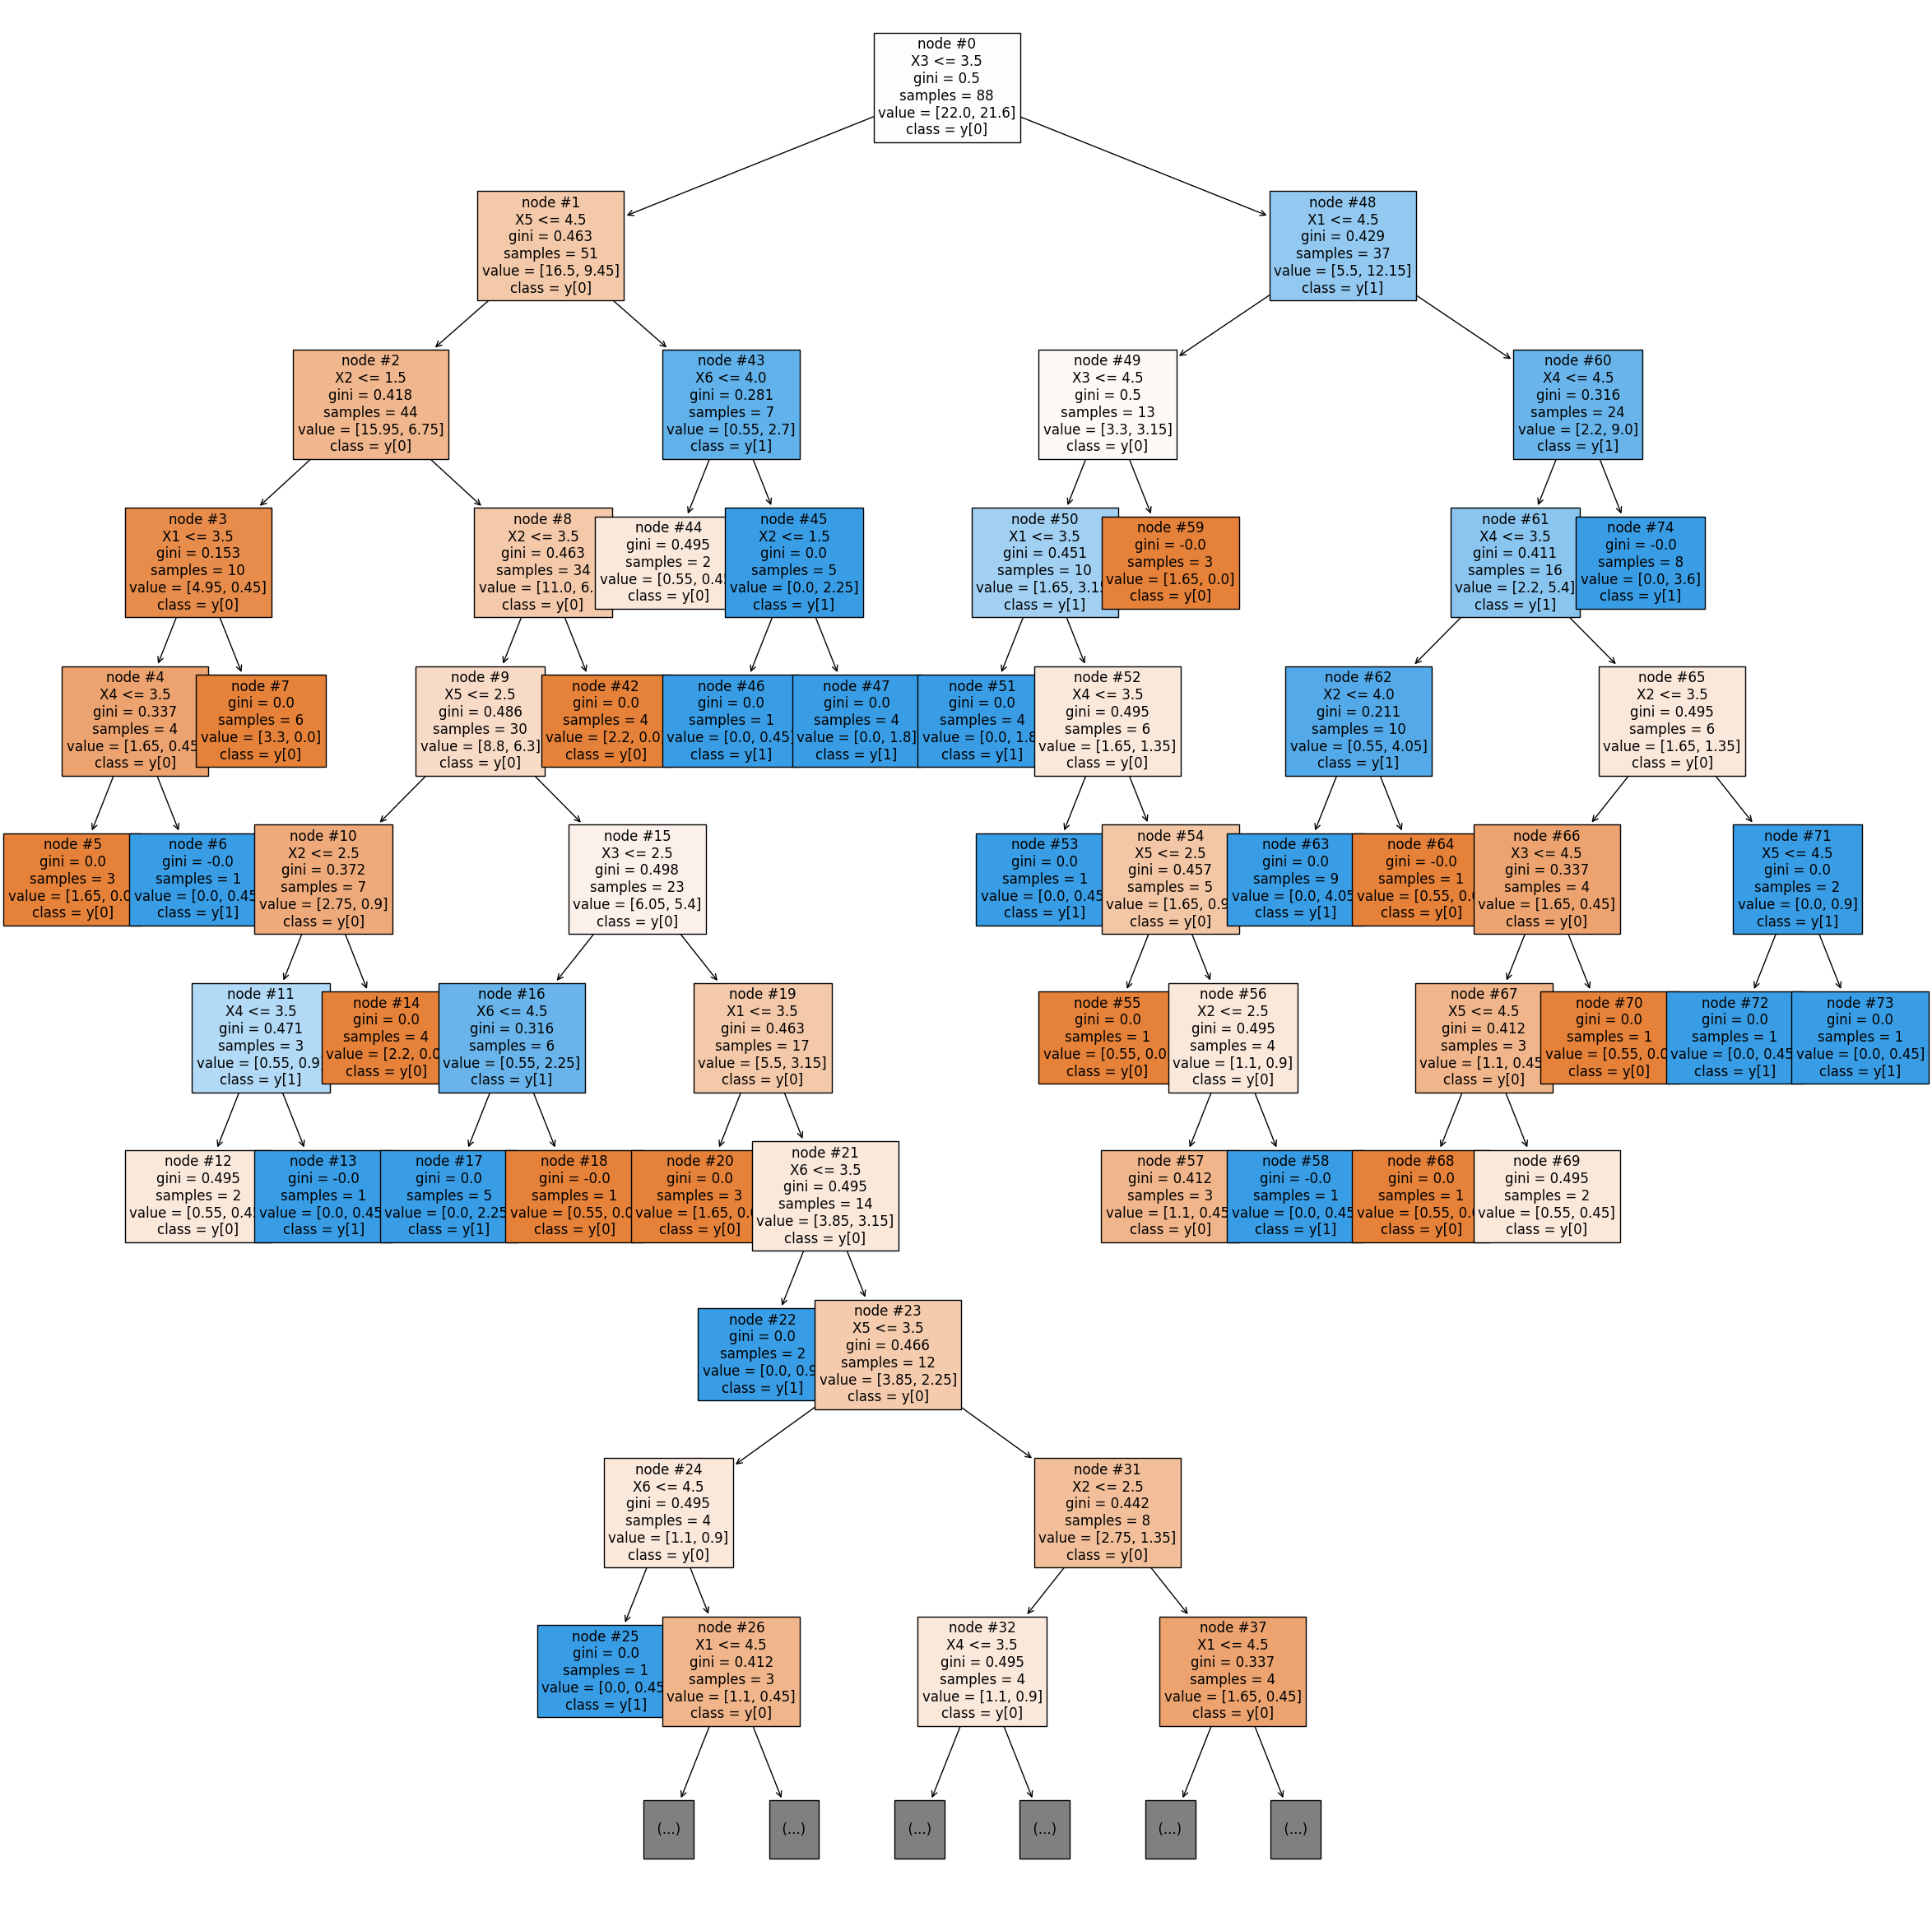

In [17]:
features = list(X.columns)
plt.figure(figsize = (30, 30))
tree.plot_tree(dt, max_depth = 10, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

**Observations:**

* Seemingly, unhappy customers are related to the satisfaction with courier (X5) and the conditions of the order (X2).

**We will attempt to tune the model and see if we can improve results.**

## **Tuning model**

### **GridSearch for Hyperparameter Tuning**

In [18]:
# Choose the type of hyperparameter
dtree_estimator = DecisionTreeClassifier(class_weight = {0 : 0.55, 1 : 0.45}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth' : np.arange(2, 10),
              'criterion' : ['gini', 'entropy'],
              'min_samples_leaf' : [5, 10, 20, 25]
             }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the Grid Search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the Grid Search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.55, 1: 0.45}, max_depth=2,
                       min_samples_leaf=20, random_state=1)

              precision    recall  f1-score   support

           0       0.59      0.75      0.66        40
           1       0.73      0.56      0.64        48

    accuracy                           0.65        88
   macro avg       0.66      0.66      0.65        88
weighted avg       0.67      0.65      0.65        88



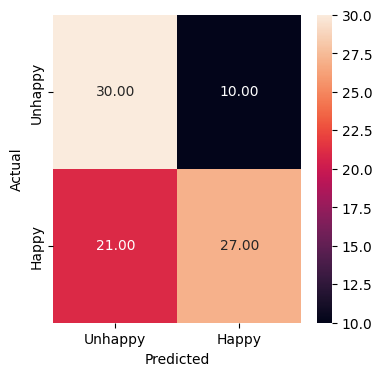

In [19]:
# Checking performance on the training dataset
y_train_pred_dt_tuned = dtree_estimator.predict(x_train)
metrics_score(y_train, y_train_pred_dt_tuned)

**Observations:**
* In comparison to the model with default values of hyperparameters, **the performance on the training dataset has gone down significantly** (recall for class 0 from 100% to 75%). Hence, reducing overfitting.

              precision    recall  f1-score   support

           0       0.40      0.59      0.48        17
           1       0.46      0.29      0.35        21

    accuracy                           0.42        38
   macro avg       0.43      0.44      0.41        38
weighted avg       0.43      0.42      0.41        38



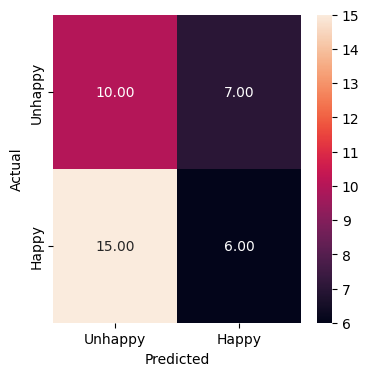

In [20]:
# Checking performance on the test dataset
y_test_pred_dt_tuned = dtree_estimator.predict(x_test)
metrics_score(y_test, y_test_pred_dt_tuned)

In [21]:
dtree_tuned_test = model_performance_classification(dtree_estimator, x_test, y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.430769,0.436975,0.421053


**Observations:**
* Results were slightly worse than those obtained before tuning. Recall for class 0 is now 59% vs 65% before tuning.

**We will examine the feature importances for this model to get more insights on it.**

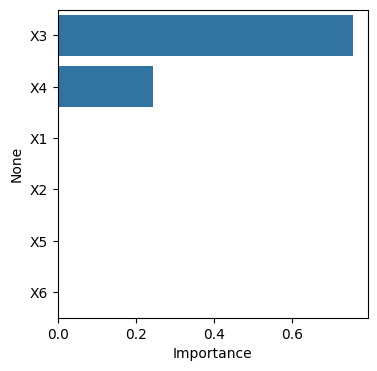

In [22]:
importances = dtree_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (4, 4))
sns.barplot(y = importance_df.index, x = importance_df.Importance)
plt.show()

**Observations:**
* After tuning the model, we see that practically the most important feature is X3 (*I ordered everything I wanted to order*), followed -in a distant second place- X4 (*I paid a good price for my order*), indicating that the model present **high bias**, oversimplifying the problem and not fully detecting patterns with other variables.

**Let's plot the tuned tree**

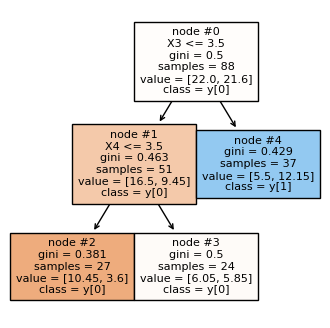

In [23]:
features = list(X.columns)
plt.figure(figsize = (4,4))
tree.plot_tree(dtree_estimator, max_depth = 2, feature_names = features, filled = True, fontsize = 8, node_ids = True, class_names = True)
plt.show()

**Observations:**

* As previously stated, the tuned tree oversimplifies the problem. Gini score is nearly ~ 0.45 @ node #2, indicating high impurity.

## **Building a Random Forest Classifier.**

We will apply a Random Forest Classifier as a second step in our project.

In [24]:
# Fitting the Random Forest Classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0 : 0.55, 1 : 0.45}, random_state = 1)
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.55, 1: 0.45}, random_state=1)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.94      0.94      0.94        48

    accuracy                           0.93        88
   macro avg       0.93      0.93      0.93        88
weighted avg       0.93      0.93      0.93        88



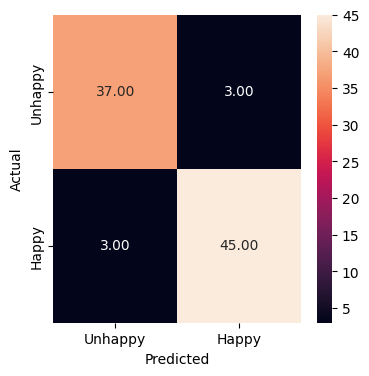

In [25]:
# Checking performance on the training data.
y_train_pred_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_train_pred_rf)

**Observations:**

* The Random Forest is giving a **93% score in recall for class 0.**

              precision    recall  f1-score   support

           0       0.50      0.71      0.59        17
           1       0.64      0.43      0.51        21

    accuracy                           0.55        38
   macro avg       0.57      0.57      0.55        38
weighted avg       0.58      0.55      0.55        38



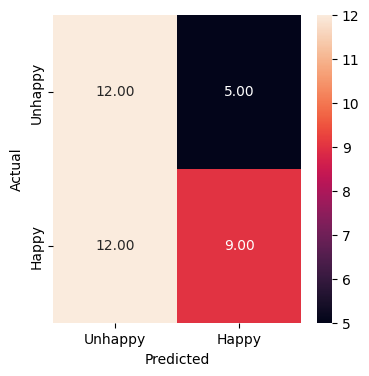

In [26]:
# Checking performance on the testing data
y_test_pred_rf = rf_estimator.predict(x_test)
metrics_score(y_test, y_test_pred_rf)

In [27]:
rf_estimator_test = model_performance_classification(rf_estimator, x_test, y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.571429,0.567227,0.552632


**Observations:**
* The Random Forest classifier **seems to be overfitting the training data.** The recall on the training data is 93%, while on the test data is only 71%.

**Let's check the feature importance of the Random Forest**

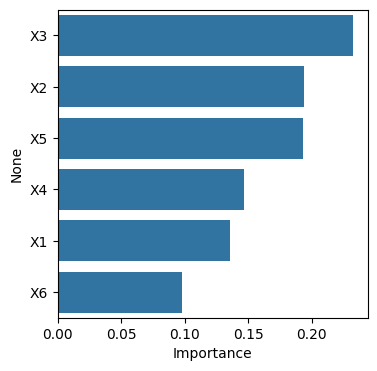

In [28]:
importances = rf_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (4, 4))
sns.barplot(x = importance_df.Importance, y = importance_df.index)
plt.show()

**Observations:**

* The Random Forest Classifier ponderates as the most important features, in descending order, X3, X2, X5.

_________________________________________________________
## ------------**Work In Process**-----------------------